In [1]:
import sys
if "../.." not in sys.path: sys.path.insert(0, "../..")
if ".." not in sys.path: sys.path.insert(0, "..")

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

from experiment.v1dd_client import V1DDClient
from experiment.v1dd_ophys_session import V1DDOPhysSession
from stimulus_analysis.locally_sparse_noise import LocallySparseNoise
from stimulus_analysis.timing_utils import find_nearest, get_frame_window_from_time_window
from statsmodels.sandbox.stats.multicomp import multipletests

from analysis_tools import set_stylesheet
set_stylesheet()

%load_ext autoreload
%autoreload 2

/var/folders/8l/944wpj6s7sq8gcv57wcd3q6h0000gn/T/ipykernel_19075/2526912653.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import tifffile

In [3]:
# windows
# base_folder = r"\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data"

# # linux and mac
# base_folder = "/allen/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
# base_folder = "/Volumes/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
base_folder = "/Users/chase/Desktop/test_v1dd_data"
client = V1DDClient(base_folder)

In [4]:
mouse = 409828
col, vol = 1, 3
sess = client.load_ophys_session(mouse=mouse, column=col, volume=vol)
print(f"Loaded ophys session {sess.get_session_id()} (mouse {sess.get_mouse_id()}, column {sess.get_column_id()}, volume {sess.get_volume_id()})")

Loaded ophys session M409828_13 (mouse 409828, column 1, volume 3)


In [5]:
plane = sess.get_planes()[1]
print(f"Analyzing plane {plane}")

Analyzing plane 2


In [6]:
lsn = LocallySparseNoise(sess, plane)

In [7]:
lsn.sweep_responses.shape

(1705, 1222)

In [8]:
lsn.design_matrix.sum(axis=1)

array([44, 44, 44, 44, 43, 44, 44, 44, 43, 44, 44, 44, 44, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 44, 44, 43, 43, 43, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 44, 44, 44, 43, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 44,
       44, 44, 43, 44, 44, 44, 44, 44, 44, 43, 44, 44, 44, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 44, 44, 44, 44, 44, 44, 43,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 44,
       44, 44, 44, 44, 44, 44, 43, 43, 44, 44, 44, 44, 43, 44, 44, 44, 43,
       44, 44, 44])

In [9]:
import stimulus_analysis.proba_utils as proba

In [10]:
lsn.is_roi_valid[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

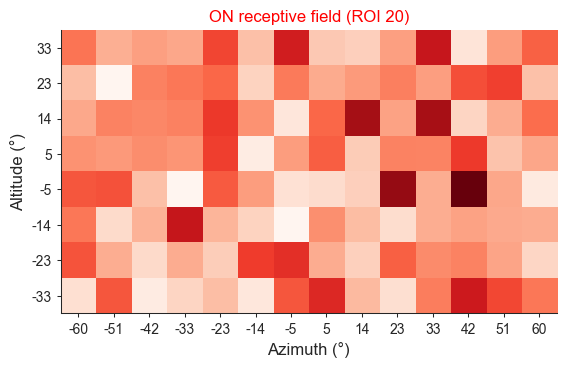

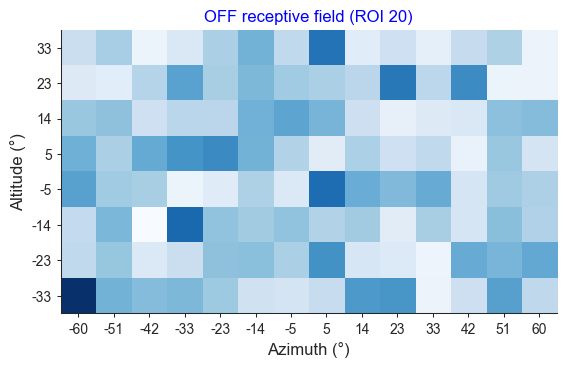

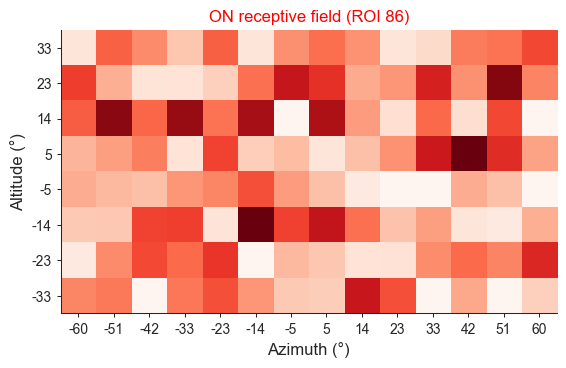

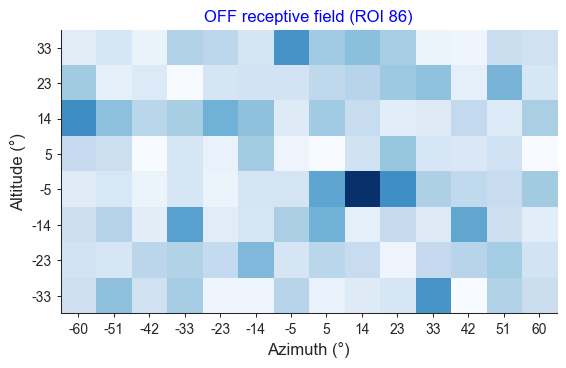

In [11]:
obs = proba.compute_chisq_observed(lsn.sweep_responses, lsn.design_matrix.T, lsn.design_matrix.sum(axis=1))

for roi in (20, 86):
# for roi in (0, 1, 2, 3):
    lsn.plot_rf(obs[roi, :lsn.n_pixels].reshape(lsn.image_shape), is_on=True, desc=f"ROI {roi}")
    lsn.plot_rf(obs[roi, lsn.n_pixels:].reshape(lsn.image_shape), is_on=False, desc=f"ROI {roi}")

In [12]:
print("sweep_responses", lsn.sweep_responses.shape)
print("design_matrix", lsn.design_matrix.shape)

sweep_responses (1705, 1222)
design_matrix (896, 1705)


In [37]:
lsn.pixel_table

,i,j,azi,alt,frames_on,frames_off
0,0,0,-60.45,-32.55,"[25, 73, 89, 149, 189, 229, 258, 311, 337, 372...","[37, 41, 101, 148, 190, 228, 269, 306, 345, 37..."
1,0,1,-51.15,-32.55,"[38, 51, 103, 132, 161, 230, 263, 305, 329, 35...","[12, 54, 93, 151, 175, 193, 254, 277, 334, 378..."
2,0,2,-41.85,-32.55,"[34, 66, 111, 140, 160, 210, 268, 290, 343, 36...","[16, 50, 79, 142, 167, 194, 270, 307, 347, 353..."
3,0,3,-32.55,-32.55,"[5, 57, 109, 153, 177, 199, 250, 274, 327, 380...","[30, 70, 114, 116, 183, 204, 255, 308, 336, 35..."
4,0,4,-23.25,-32.55,"[15, 65, 115, 139, 191, 196, 264, 285, 320, 38...","[24, 58, 100, 134, 178, 215, 266, 289, 335, 37..."
...,...,...,...,...,...,...
107,7,9,23.25,32.55,"[23, 46, 104, 142, 169, 225, 245, 274, 321, 38...","[32, 51, 108, 125, 186, 226, 266, 292, 346, 38..."
108,7,10,32.55,32.55,"[20, 47, 81, 134, 155, 228, 235, 284, 335, 366...","[3, 75, 112, 127, 161, 207, 256, 302, 314, 354..."
109,7,11,41.85,32.55,"[16, 71, 110, 144, 167, 209, 247, 309, 336, 36...","[24, 56, 109, 140, 175, 212, 271, 298, 324, 37..."
110,7,12,51.15,32.55,"[0, 63, 114, 148, 188, 211, 261, 308, 344, 353...","[31, 41, 83, 151, 174, 218, 236, 306, 337, 384..."


In [87]:
def get_stim_showing_events(lsn, method="mean"):
    """
    Get a matrix of shape (n_stim_showings, n_rois) representing neural responses
    to each stimulus showing.

    Args:
        lsn (_type_): _description_
        method (str, optional): _description_. Defaults to "mean".

    Returns:
        _type_: _description_
    """
    # Assumes events and timestamps are 1d arrays corresponding to a single ROI
    stim_sweep_events = np.empty((lsn.n_stim_showings, lsn.n_rois))

    for stim_i, stim in lsn.stim_table.iterrows():
        start = find_nearest(lsn.event_timestamps, stim["start"], direction=-1)
        end = find_nearest(lsn.event_timestamps, stim["end"])
        mean_event = lsn.event_traces[:, start:end+1].mean(axis=1)

        if method == "mean":
            event = mean_event
        elif method == "binary":
            event = mean_event > 0
        else:
            raise NotImplementedError()

        stim_sweep_events[stim_i] = event

    return stim_sweep_events


def get_sta(lsn, design_matrix, sweep_events):
    sta = design_matrix.dot(sweep_events)
    shape = (-1, *lsn.image_shape) # (n_rois, n_rows, n_cols)
    sta_on = sta[:lsn.n_pixels].reshape(shape)
    sta_off = sta[lsn.n_pixels:].reshape(shape)

    return sta_on, sta_off



def get_greedy_pixelwise_pvals(lsn, design_matrix, stim_showing_events, alpha=0.05):
    p_values = events_to_pvals_no_fdr_correction(lsn, design_matrix, stim_showing_events)
    
    # Correct for multiple comparisons across all pixels (Holm-Sidak)
    from statsmodels.sandbox.stats.multicomp import multipletests
    fdr_corrected_p_values = multipletests(p_values, alpha=alpha)[1]

    # Convert to 2d pixel array
    image_shape = lsn.frame_images.shape[1:]
    corr_p_values_on = fdr_corrected_p_values[:lsn.n_pixels].reshape(image_shape)
    corr_p_values_off = fdr_corrected_p_values[lsn.n_pixels:].reshape(image_shape)

    return corr_p_values_on, corr_p_values_off


def get_shuffled_pixelwise_responses(lsn, design_matrix, stim_showing_events, n_shuffles=5000, seed=1):
    """_summary_

    Args:
        lsn (_type_): _description_
        design_matrix (np.ndarray): Of shape (2*n_pixels, n_stim_showings)
        stim_showing_events (np.ndarray): Of shape (n_stim_showings, n_rois)
        n_shuffles (int, optional): _description_. Defaults to 5000.
        seed (int, optional): _description_. Defaults to 1.

    Returns:
        np.ndarray: Of shape (2*n_pixels, n_rois, n_stim_showings)
    """
    np.random.seed(seed)
    shuffled_stas = np.zeros((2*lsn.n_pixels, lsn.n_rois, n_shuffles))
    
    for shuffle_i in tqdm(range(n_shuffles)):
        # Choose random stimulus showings, with replacement
        random_stim_idx = np.random.randint(low=0, high=lsn.n_stim_showings, size=lsn.n_stim_showings)
        shuffled_events = stim_showing_events[random_stim_idx, :] # shape (n_stim_showings, n_rois)
        shuffled_stas[:, :, shuffle_i] = design_matrix.dot(shuffled_events) # shape (2*n_pixels, n_rois)

    return shuffled_stas


def events_to_pvals_no_fdr_correction(lsn, design_matrix, stim_showing_events, n_shuffles=5000, seed=1):
    """_summary_

    Args:
        lsn (_type_): _description_
        design_matrix (_type_): _description_
        stim_showing_events (_type_): _description_
        n_shuffles (int, optional): _description_. Defaults to 5000.
        seed (int, optional): _description_. Defaults to 1.

    Returns:
        np.ndarray: Of shape (2*n_pixels, n_rois)
    """
    shuffled_stas = get_shuffled_pixelwise_responses(lsn, design_matrix, stim_showing_events, n_shuffles=n_shuffles, seed=seed)
    # ^ shuffled_stas.shape = (2*n_pixels, n_rois, n_shuffles)

    # p values are the fraction of times the shuffled response at each pixel is greater than
    # the actual observed response to that pixel
    sta = design_matrix.dot(stim_showing_events) # shape (2*n_pixels, n_rois)
    p_values = np.mean(shuffled_stas > sta.reshape(*sta.shape, 1), axis=2)
    return p_values

In [105]:
shuffled_stas = get_shuffled_pixelwise_responses(lsn, design_matrix_blur, stim_showing_events, n_shuffles=1000)
shuffled_stas.shape

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [89]:
events_to_pvals_no_fdr_correction(lsn, design_matrix_blur, stim_showing_events, n_shuffles=100).shape

  0%|          | 0/100 [00:00<?, ?it/s]

(224, 1234)

In [13]:
lsn.design_matrix

AttributeError: 'LocallySparseNoise' object has no attribute '_design_matrix'

In [40]:
stim_showing_events = get_stim_showing_events(lsn)
stim_showing_events.shape

(1705, 1234)

In [43]:
design_matrix_blur = get_design_matrix(lsn, blur=True)
design_matrix_blur.shape

(224, 1705)

In [107]:
p_values = events_to_pvals_no_fdr_correction(lsn, design_matrix_blur, stim_showing_events, n_shuffles=1000)
    
# Correct for multiple comparisons across all pixels (Holm-Sidak)
fdr_corrected_p_values = np.empty_like(p_values)

for roi in range(p_values.shape[1]):
    fdr_corrected_p_values[:, roi] = multipletests(p_values[:, roi], alpha=0.05)[1]

fdr_corrected_p_values

  0%|          | 0/1000 [00:00<?, ?it/s]

/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999947],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.99990957, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.99687815, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.99984572, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

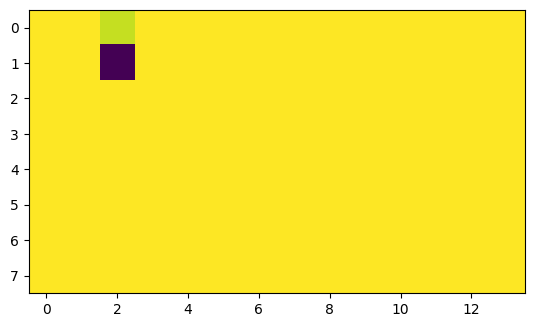

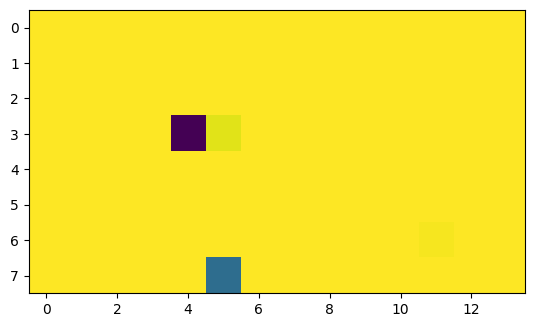

In [112]:
# Convert to 2d pixel array
roi = 6
corr_p_values_on = fdr_corrected_p_values[:lsn.n_pixels, roi].reshape(lsn.image_shape)
corr_p_values_off = fdr_corrected_p_values[lsn.n_pixels:, roi].reshape(lsn.image_shape)

plt.imshow(corr_p_values_off)
plt.figure()
plt.imshow(corr_p_values_on)

## Dan mimic

In [131]:
from stimulus_analysis.proba_utils import get_chisq_response_proba, get_chisq_sweep_categories

In [114]:
lsn.stim_table

,start,end,frame
0,635.117737,635.417969,0
1,635.434692,635.734924,1
2,635.751587,636.051819,2
3,636.068481,636.368774,3
4,636.385437,636.685791,4
...,...,...,...
1700,2096.668213,2096.968506,107
1701,2096.985107,2097.285400,108
1702,2097.302002,2097.602295,109
1703,2097.618896,2097.919189,110


In [147]:
lsn.sweep_responses

AttributeError: 'LocallySparseNoise' object has no attribute '_sweep_responses'

In [126]:
sweep_responses = np.zeros((len(lsn.stim_table), lsn.n_rois), dtype=lsn.event_traces.dtype)
for i in lsn.stim_table.index:
    start_frame = find_nearest(lsn.event_timestamps, lsn.stim_table.at[i, "start"])
    sweep_responses[i] = lsn.get_responses(start_frame, None, lsn_response_frame_window, trace_type="events")

sweep_responses.shape

(1705, 1234)

In [136]:
np.unique(lsn.stim_table.frame.values)

array([   0,    1,    2, ..., 1590, 1591, 1592])

In [137]:
stim_table_values = lsn.stim_table["frame"].values
unique_values = [lsn.stim_table[c].dropna().sort_values().unique() for c in ["frame"]]
unique_values

[array([   0,    1,    2, ..., 1590, 1591, 1592])]

In [143]:
p_values = get_chisq_response_proba(lsn.stim_table, stim_table_columns=["frame"], sweep_responses=sweep_responses, n_shuffles=100, debug=True)
p_values.shape

1593 categories: [   0    1    2 ... 1590 1591 1592]


(1234,)